In [1]:
import matplotlib.pyplot as plt
import numpy as np


def write_signal_file(file_path, signal):
    signal.astype(np.uint16).tofile(file_path, sep='\n')

In [2]:
# Constants: 
FILE_PREFIX = 'test_signal_'
FILE_SUFFIX = '.dat'
SAMPLING_FREQUENCY = 22 * 1_000 # 10 kHz
NUM_SAMPLES = SAMPLING_FREQUENCY # 1 second
MIN_INTENSITY = 0 # 0 intensity
MAX_INTENSITY = 65535 # 1 intensity

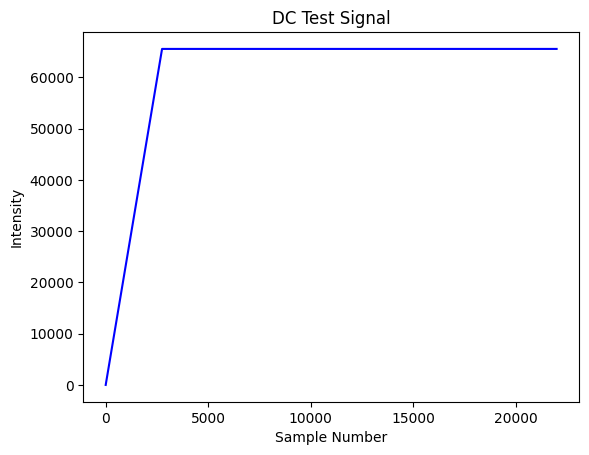

In [3]:
# Create the DC test signal:
RAMP_AMOUNT = 0.125 # 12.5% of the total number of samples

# DC test signal consists of a constant value of max_frequency for all samples after a ramp up period.
# The ramp up period consists of floor(0.125 * num_samples) of the total number of samples and starts at min_frequency.
# There is at least one sample at min_frequency.
num_ramp_up_samples = int(np.floor(RAMP_AMOUNT * NUM_SAMPLES)) + 1

# Create the numpy array of samples.
dc_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)

# Ramp up the DC signal.
dc_samples[:num_ramp_up_samples] = np.linspace(
    MIN_INTENSITY, MAX_INTENSITY, num_ramp_up_samples, dtype=np.uint16)

# Set the DC signal to maximum intensity.
dc_samples[num_ramp_up_samples:] = MAX_INTENSITY

# Plot the DC test signal.
plt.plot(dc_samples, 'b-')
plt.title('DC Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the DC test signal to a file.
write_signal_file(FILE_PREFIX + 'dc' + FILE_SUFFIX, dc_samples)


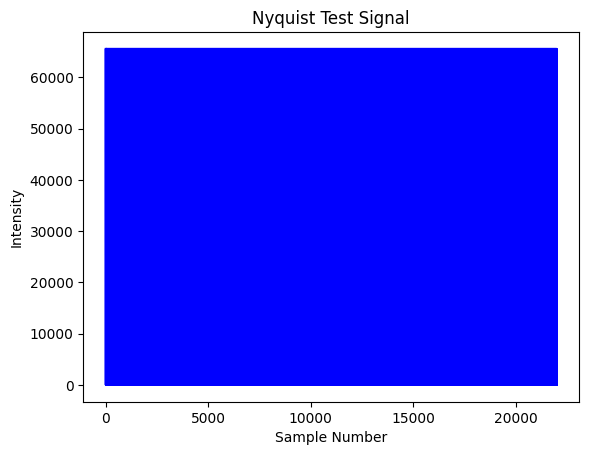

In [4]:
# Create the Nyquist test signal:

# Nyquist test signal consists of alternating max and min intensity values.
# Create the numpy array of samples.
nyquist_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)

# Set the Nyquist signal to alternating max and min intensity values.
nyquist_samples[::2] = MAX_INTENSITY
nyquist_samples[1::2] = MIN_INTENSITY

# Plot the Nyquist test signal.
plt.plot(nyquist_samples, 'b-')
plt.title('Nyquist Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the Nyquist test signal to a file.
write_signal_file(FILE_PREFIX + 'nyquist' + FILE_SUFFIX, nyquist_samples)


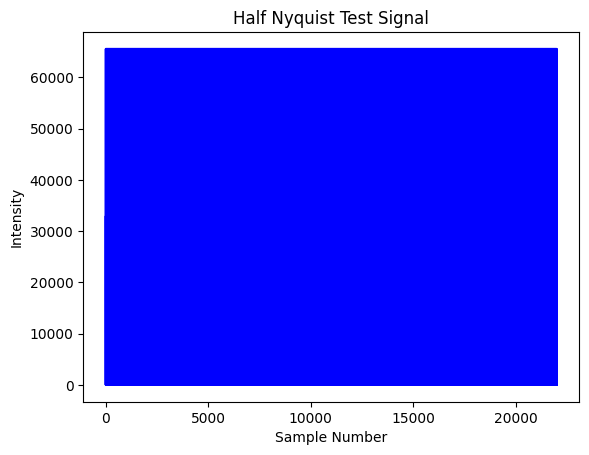

In [5]:
# Create the Half Nyquist test signal:

# Half nyquist adds a third intensity value that is halfway between the max and min intensity values to approximate a sine wave.

# Create the numpy array of samples.
half_nyquist_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)

# Set the Nyquist signal to alternating max and min intensity values.
half_nyquist_samples[::2] = (MAX_INTENSITY-MIN_INTENSITY) / 2
half_nyquist_samples[1::4] = MAX_INTENSITY
half_nyquist_samples[3::4] = MIN_INTENSITY

# Plot the Half Nyquist test signal.
plt.plot(half_nyquist_samples, 'b-')
plt.title('Half Nyquist Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the Half Nyquist test signal to a file.
write_signal_file(FILE_PREFIX + 'half_nyquist' + FILE_SUFFIX, half_nyquist_samples)


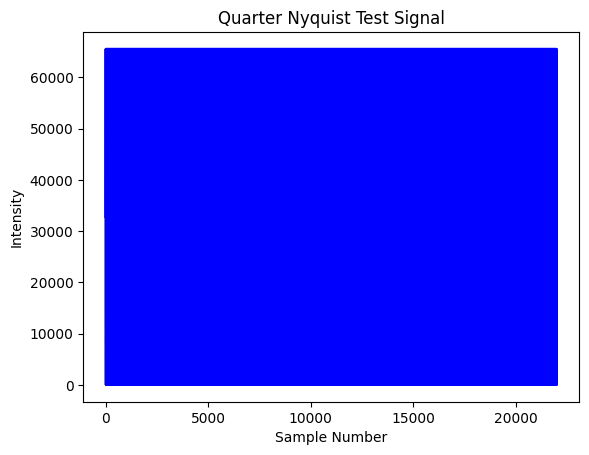

In [6]:
# Create the Quarter Nyquist test signal:

# Quarter nyquist adds two additional intensity values that are a quarter and three quarters of the way between the max and min intensity values to approximate a sine wave.

# Create the numpy array of samples.
quarter_nyquist_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)

# Set the Nyquist signal to alternating max and min intensity values.
quarter_nyquist_samples[::4] = (MAX_INTENSITY-MIN_INTENSITY) / 2
quarter_nyquist_samples[1::8] = (MAX_INTENSITY-MIN_INTENSITY) * 3 / 4
quarter_nyquist_samples[2::8] = MAX_INTENSITY
quarter_nyquist_samples[3::8] = (MAX_INTENSITY-MIN_INTENSITY) * 3 / 4
quarter_nyquist_samples[5::8] = (MAX_INTENSITY-MIN_INTENSITY) / 4
quarter_nyquist_samples[6::8] = MIN_INTENSITY
quarter_nyquist_samples[7::8] = (MAX_INTENSITY-MIN_INTENSITY) / 4

# Plot the Quarter Nyquist test signal.
plt.plot(quarter_nyquist_samples, 'b-')
plt.title('Quarter Nyquist Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the Quarter Nyquist test signal to a file.
write_signal_file(FILE_PREFIX + 'quarter_nyquist' + FILE_SUFFIX, quarter_nyquist_samples)


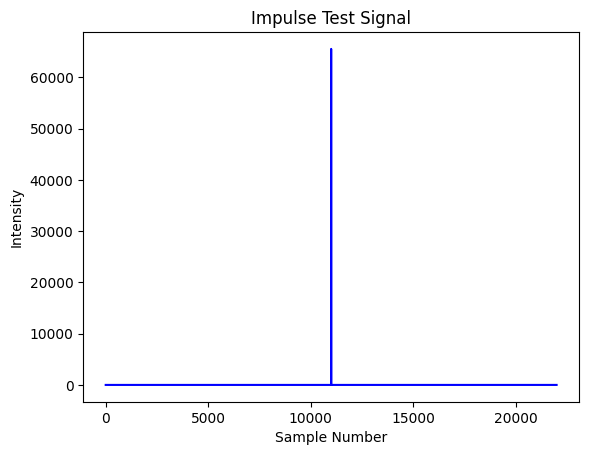

In [7]:
# Create the Impulse test signal:
IMPLUSE_POSITION = 0.5 * NUM_SAMPLES # Halfway through the samples
IMPLUSE_POSITION = np.clip(int(IMPLUSE_POSITION), 0, NUM_SAMPLES-1) # Ensure the impulse position is within the bounds of the samples.

# Impulse test signal consists of a single sample at max intensity occurring at the midpoint of the samples.

impulse_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)
impulse_samples[::1] = MIN_INTENSITY
impulse_samples[IMPLUSE_POSITION] = MAX_INTENSITY

# Plot the Impulse test signal.
plt.plot(impulse_samples, 'b-')
plt.title('Impulse Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the Impulse test signal to a file.
write_signal_file(FILE_PREFIX + 'impulse' + FILE_SUFFIX, impulse_samples)
